In [1]:
from google.colab import files
uploaded=files.upload()

Saving Titanic.csv to Titanic.csv


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('Titanic.csv')

In [3]:
df.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [10]:
df.shape

(2201, 4)

In [4]:
df['Class'].value_counts()

Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

In [6]:
df['Gender'].value_counts()

Male      1731
Female     470
Name: Gender, dtype: int64

In [7]:
df['Age'].value_counts()

Adult    2092
Child     109
Name: Age, dtype: int64

In [8]:
df['Survived'].value_counts()

No     1490
Yes     711
Name: Survived, dtype: int64

In [9]:
from mlxtend.frequent_patterns import apriori,association_rules

In [11]:
df1=pd.get_dummies(df)

In [12]:
df1.shape

(2201, 10)

In [17]:
frequent_itemsets = apriori(df1, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [18]:
frequent_itemsets.shape

(35, 2)

In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694,0.639010
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493,0.037128
2,(Age_Adult),(Class_2nd),0.950477,0.129487,0.118582,0.124761,0.963505,-0.004492,0.994601,-0.433377
3,(Class_2nd),(Age_Adult),0.129487,0.950477,0.118582,0.915789,0.963505,-0.004492,0.588085,-0.041697
4,(Class_3rd),(Gender_Male),0.320763,0.786461,0.231713,0.722380,0.918520,-0.020555,0.769177,-0.115514
...,...,...,...,...,...,...,...,...,...,...
101,"(Age_Adult, Gender_Male)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764,0.986022
102,(Class_Crew),"(Survived_No, Age_Adult, Gender_Male)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802,0.338549
103,(Survived_No),"(Class_Crew, Age_Adult, Gender_Male)",0.676965,0.391640,0.304407,0.449664,1.148157,0.039280,1.105434,0.399458
104,(Age_Adult),"(Class_Crew, Survived_No, Gender_Male)",0.950477,0.304407,0.304407,0.320268,1.052103,0.015075,1.023334,1.000000


In [21]:
rules.shape

(106, 10)

In [22]:
list(rules)

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction',
 'zhangs_metric']

In [23]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
65,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542,0.700873
68,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431,0.835403
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187,0.710327
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634,0.825219
64,"(Age_Adult, Survived_Yes)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732,0.793974
...,...,...,...,...,...,...,...,...,...,...
4,(Class_3rd),(Gender_Male),0.320763,0.786461,0.231713,0.722380,0.918520,-0.020555,0.769177,-0.115514
81,"(Survived_No, Age_Adult, Gender_Male)",(Class_3rd),0.603816,0.320763,0.175829,0.291196,0.907823,-0.017853,0.958286,-0.204002
88,(Class_3rd),"(Survived_No, Age_Adult, Gender_Male)",0.320763,0.603816,0.175829,0.548159,0.907823,-0.017853,0.876820,-0.130045
30,"(Age_Adult, Gender_Male)",(Class_3rd),0.757383,0.320763,0.209905,0.277145,0.864016,-0.033036,0.939658,-0.393462


import numpy as np
from google.colab import autoviz
df_4185718825080964482 = autoviz.get_registered_df('df_4185718825080964482')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4185718825080964482, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8609106511715296578 = autoviz.get_registered_df('df_8609106511715296578')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8609106511715296578, *['antecedent support'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2858642935744403726 = autoviz.get_registered_df('df_2858642935744403726')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2858642935744403726, *['consequent support'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9213906660891455972 = autoviz.get_registered_df('df_9213906660891455972')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9213906660891455972, *['support'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2025782325472169992 = autoviz.get_registered_df('df_2025782325472169992')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2025782325472169992, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8569980230651598994 = autoviz.get_registered_df('df_8569980230651598994')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8569980230651598994, *['antecedent support'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1566202114761297608 = autoviz.get_registered_df('df_1566202114761297608')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1566202114761297608, *['consequent support'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3193250721028123645 = autoviz.get_registered_df('df_3193250721028123645')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3193250721028123645, *['support'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3765882033650823966 = autoviz.get_registered_df('df_3765882033650823966')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3765882033650823966, *[[['index', 'antecedent support'], ['antecedent support', 'consequent support'], ['consequent support', 'support'], ['support', 'confidence']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [24]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
65,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542,0.700873
68,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431,0.835403
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187,0.710327
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634,0.825219
64,"(Age_Adult, Survived_Yes)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732,0.793974
69,(Gender_Female),"(Age_Adult, Survived_Yes)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099,0.709577
101,"(Age_Adult, Gender_Male)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764,0.986022
96,"(Class_Crew, Survived_No)","(Age_Adult, Gender_Male)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079,0.344592
48,"(Age_Adult, Gender_Male)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157,0.916706
49,(Class_Crew),"(Age_Adult, Gender_Male)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480,0.371976


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

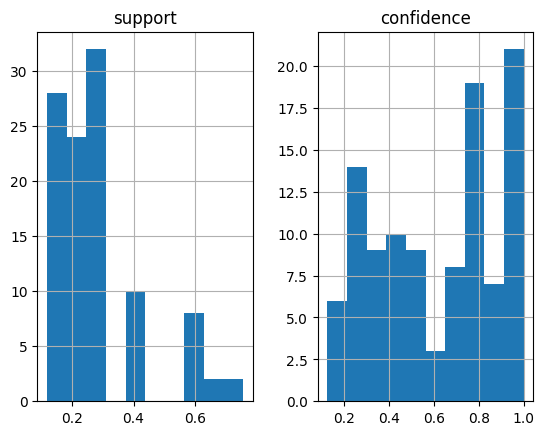

In [25]:
rules[['support','confidence']].hist()

rules[['support','confidence']].hist()

rules[['support','confidence','lift']].hist()


plt.scatter(rules['support'], rules['confidence'])
plt.show()


import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')

plt.show()






array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

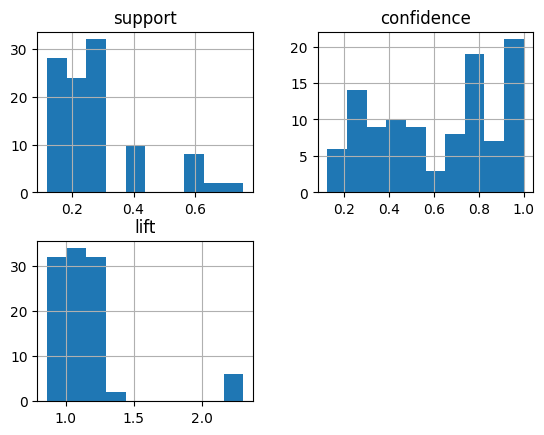

In [26]:
rules[['support','confidence','lift']].hist()

In [30]:
import matplotlib.pyplot as plt


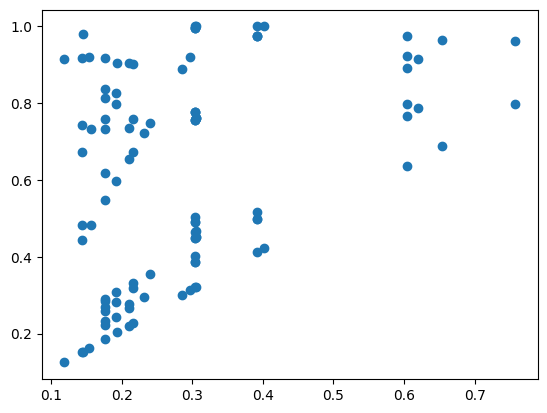

In [31]:
plt.scatter(rules['support'], rules['confidence'])

In [35]:
import seaborn as sns



<Axes: xlabel='support', ylabel='confidence'>

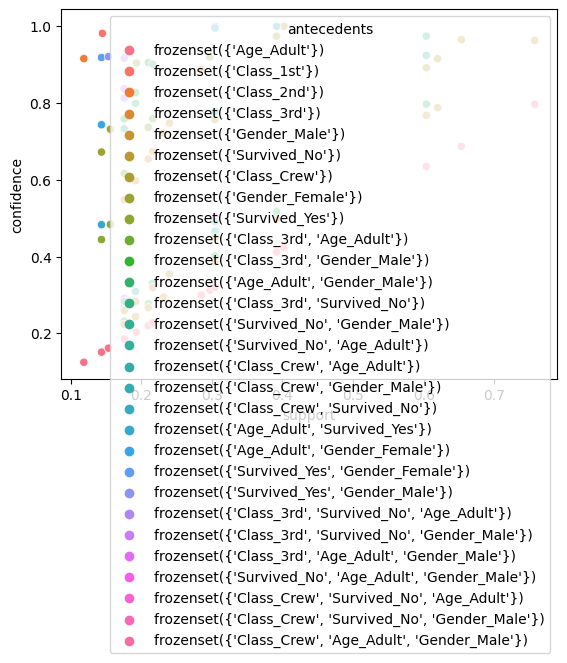

In [46]:
sns.scatterplot(x='support',y='confidence',data=rules,hue='antecedents')
